**Hong Phuc Pham - a1843625**

In [1]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
time: 491 µs (started: 2022-09-22 02:40:28 +00:00)


In [2]:
# Install the dataset library
!pip install libsvmdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 4.04 s (started: 2022-09-22 02:40:28 +00:00)


In [3]:
## Loading database
from libsvmdata import fetch_libsvm
X, y = fetch_libsvm("diabetes_scale")

file_sizes: 100%|███████████████████████████| 68.6k/68.6k [00:00<00:00, 227kB/s]
time: 3.32 s (started: 2022-09-22 02:40:32 +00:00)


In [4]:
X

array([[-0.294118  ,  0.487437  ,  0.180328  , ...,  0.00149028,
        -0.53117   , -0.0333333 ],
       [-0.882353  , -0.145729  ,  0.0819672 , ..., -0.207153  ,
        -0.766866  , -0.666667  ],
       [-0.0588235 ,  0.839196  ,  0.0491803 , ..., -0.305514  ,
        -0.492741  , -0.633333  ],
       ...,
       [-0.411765  ,  0.21608   ,  0.180328  , ..., -0.219076  ,
        -0.857387  , -0.7       ],
       [-0.882353  ,  0.266332  , -0.0163934 , ..., -0.102832  ,
        -0.768574  , -0.133333  ],
       [-0.882353  , -0.0653266 ,  0.147541  , ..., -0.0938897 ,
        -0.797609  , -0.933333  ]])

time: 6.87 ms (started: 2022-09-22 02:40:35 +00:00)


In [5]:
# Checking labels
y

array([-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
       -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1

time: 16.5 ms (started: 2022-09-22 02:40:36 +00:00)


In [6]:
# Checking dataset features
X

array([[-0.294118  ,  0.487437  ,  0.180328  , ...,  0.00149028,
        -0.53117   , -0.0333333 ],
       [-0.882353  , -0.145729  ,  0.0819672 , ..., -0.207153  ,
        -0.766866  , -0.666667  ],
       [-0.0588235 ,  0.839196  ,  0.0491803 , ..., -0.305514  ,
        -0.492741  , -0.633333  ],
       ...,
       [-0.411765  ,  0.21608   ,  0.180328  , ..., -0.219076  ,
        -0.857387  , -0.7       ],
       [-0.882353  ,  0.266332  , -0.0163934 , ..., -0.102832  ,
        -0.768574  , -0.133333  ],
       [-0.882353  , -0.0653266 ,  0.147541  , ..., -0.0938897 ,
        -0.797609  , -0.933333  ]])

time: 4.74 ms (started: 2022-09-22 02:40:36 +00:00)


In [7]:
X.shape

(768, 8)

time: 4.86 ms (started: 2022-09-22 02:40:36 +00:00)


In [8]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

time: 79.2 ms (started: 2022-09-22 02:40:36 +00:00)


In [9]:
print(f'X Train size - {X_train.shape} \nX Test size - {X_test.shape}')

X Train size - (614, 8) 
X Test size - (154, 8)
time: 2.48 ms (started: 2022-09-22 02:40:36 +00:00)


## Rewrite through provided algorithm

In [10]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

class PerceptronClassification:
  
  #constructor
  def __init__ (self):
    self.b = None # bias
    self.w = None # weights


  def observe(self, x, y_true):
    # sum_1^n(w_i*x_i) > 0 
    return y_true*np.dot(x,self.w)

  def predict(self, X):
    result = []

    for x in X:
      result.append(np.sign(np.dot(x,self.w)))

    return np.array(result)

  def fit(self, X, Y, iterNo = 1, stepSize = 1):
    sNo, fNo =  X.shape # Sample and feature
    self.w = np.zeros(fNo)
    acc_hist, loss_hist, maxAcc = [], [], 0
    cpW = None

    #for all iterNo
    for i in range(iterNo):
     
      loss = 0
      for x, y in zip(X, Y):
        obsResult = self.observe(x, y)
        
        if obsResult <= 0:
          self.w += stepSize * y * x
          loss += max(0,-y * np.dot(x, self.w))


      acc_hist.append(accuracy_score(self.predict(X), Y))
      loss_hist.append(loss/sNo)
      
      if (acc_hist[i] > maxAcc):
        maxAcc = acc_hist[i]
        cpW = self.w.copy() # check point weight

    #checkpoint (Save the weights and b value)
    self.w = cpW.copy() 
    
    return acc_hist, loss_hist, maxAcc

time: 6.37 ms (started: 2022-09-22 02:40:36 +00:00)


In [11]:
## Ploting chart
def plotResult(hist):
  fig, ax = plt.subplots(1, 2, figsize=(15,4))
  #plot the accuracy values over epochs
  ax[0].plot(hist[0], c='darkorange')
  ax[0].set_ylabel("Accuracy")
  ax[0].set_xlabel("Epoch")
  ax[0].set_ylim([0, 1])

  ax[1].plot(hist[1], c='crimson')
  ax[1].set_ylabel("Loss")
  ax[1].set_xlabel("Epoch")
  plt.show()

time: 1.47 ms (started: 2022-09-22 02:40:36 +00:00)


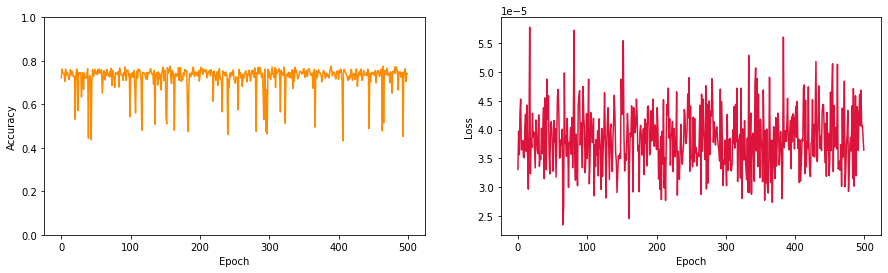

Max training accuracy: 0.7752442996742671
Test accuracy: 0.8051948051948052
time: 2.99 s (started: 2022-09-22 02:40:36 +00:00)


In [12]:
pC = PerceptronClassification()
# Training
hist = pC.fit(X_train, y_train, 500, 0.001 )
# Display result
plotResult(hist)

#making predictions on test data
Y_pred_test = pC.predict(X_test)
#checking the accuracy of the model
print(f'Max training accuracy: {hist[2]}')  
print(f'Test accuracy: {accuracy_score(Y_pred_test, y_test)}')

### Tunning

In [13]:
## Inital values
iterL = [10, 50, 100, 200, 500, 1000]
stepL = [1, 1e-1, 1e-2, 1e-3, 1e-4]

time: 1.11 ms (started: 2022-09-22 02:40:39 +00:00)


In [14]:
def reportPlot(record):
  fig, ax = plt.subplots(1, 2, figsize=(15,4))
  #plot the accuracy values over iteration
  ax[0].plot(iterL, record[0], c='darkorange')
  ax[0].plot(iterL, record[1], c='crimson')
  ax[0].plot(iterL, record[2], c='gold')
  ax[0].plot(iterL, record[3], c='mediumseagreen')
  ax[0].plot(iterL, record[4], c='dodgerblue')
  ax[0].set_title("Accuracy over iteration with different learning rate")
  ax[0].set_ylabel("Accuracy")
  ax[0].set_xlabel("Iteration")
  ax[0].legend(stepL)
  ax[0].set_ylim([0, 1])

  ax[1].plot(stepL, record[:,0], c='darkorange')
  ax[1].plot(stepL, record[:,1], c='crimson')
  ax[1].plot(stepL, record[:,2], c='gold')
  ax[1].plot(stepL, record[:,3], c='mediumseagreen')
  ax[1].plot(stepL, record[:,4], c='dodgerblue')
  ax[1].plot(stepL, record[:,5], c='darkslategrey')
  ax[1].set_title("Accuracy over step size with different iteration")
  ax[1].set_ylabel("Accuracy")
  ax[1].set_xlabel("Step size")
  ax[1].legend(iterL)
  plt.show()
  None

time: 5.9 ms (started: 2022-09-22 02:40:39 +00:00)


In [15]:
# Confuse matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plotCFMatrix(yt,yp):
  plt.figure(figsize=(6, 6))
  cmat = confusion_matrix(yt, yp, normalize='true', labels=[-1,1])
  g = sns.heatmap(cmat, annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Normalised Confusion Matrix', size = 12)
  g.set_xticklabels([-1,1])
  g.set_yticklabels([-1,1])
  plt.show()

  print(classification_report(yt,yp))
  None

time: 436 ms (started: 2022-09-22 02:40:39 +00:00)


In [16]:
def report(obj):
  # 2D array to record accuracy
  testAccRecord = np.zeros((5,6))
  trainAccRecord = np.zeros((5,6))
  for i, stepVal in enumerate(stepL):
    for j, iterVal in enumerate(iterL):
      hist = obj.fit(X_train, y_train, iterVal, stepVal)
      trainAccRecord[i,j] = hist[2]
      testAccRecord[i,j] = accuracy_score(obj.predict(X_test), y_test)

  avgAcc = np.average(testAccRecord)
  flatList = testAccRecord.flatten()
  print(f'Average test accuracy: {avgAcc} +/- {np.abs(np.mean(flatList - avgAcc))}')

  print("Accuracry on train set")
  # Training report plots
  reportPlot(trainAccRecord)

  print("Accuracry on test set")
  # Training report plots
  reportPlot(testAccRecord)

  rNo,cNo = np.unravel_index(testAccRecord.argmax(), testAccRecord.shape)
  print(f'Max test accuracy: {testAccRecord[rNo][cNo]} with Step size: {stepL[rNo]} and {iterL[cNo]} iterations')

  return (iterL[cNo], stepL[rNo],)

time: 5.69 ms (started: 2022-09-22 02:40:39 +00:00)


Average test accuracy: 0.7954545454545455 +/- 5.551115123125783e-17
Accuracry on train set


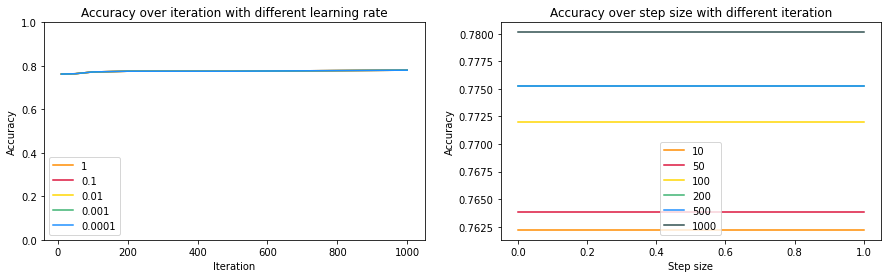

Accuracry on test set


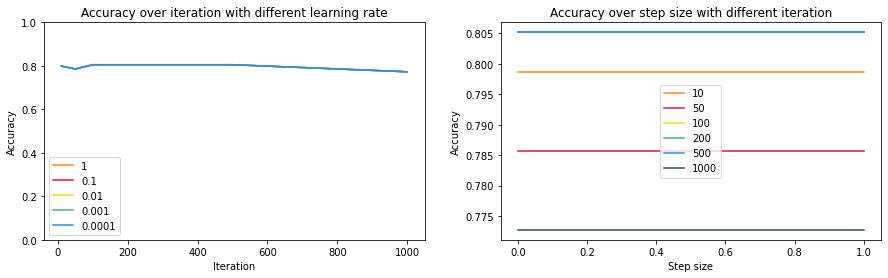

Max test accuracy: 0.8051948051948052 with Step size: 1 and 100 iterations
time: 55 s (started: 2022-09-22 02:40:39 +00:00)


In [17]:
bestParams = report(pC)

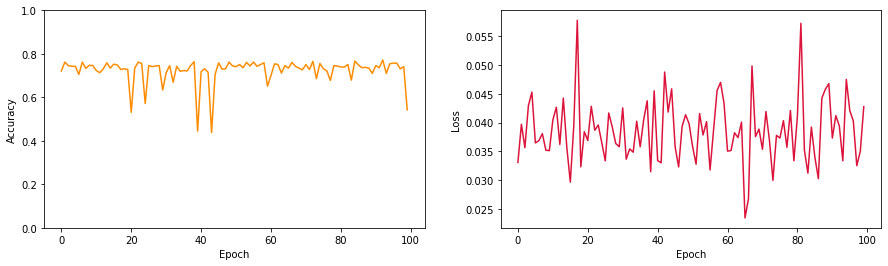

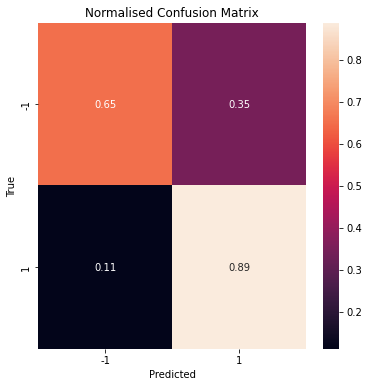

              precision    recall  f1-score   support

        -1.0       0.77      0.65      0.71        55
         1.0       0.82      0.89      0.85        99

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154

Max training accuracy: 0.7719869706840391
Test accuracy: 0.8051948051948052 

time: 976 ms (started: 2022-09-22 02:41:34 +00:00)


In [18]:
# Training
hist = pC.fit(X_train, y_train, bestParams[0], bestParams[1] )
# Display result
plotResult(hist)

#making predictions on test data
Y_pred_test = pC.predict(X_test)

# Confusion matrix
plotCFMatrix(y_test,Y_pred_test)

#checking the accuracy of the model
print(f'Max training accuracy: {hist[2]}')  
print(f'Test accuracy: {accuracy_score(Y_pred_test, y_test)} \n')

## Algorithm with bias

In [19]:
class PerceptronBiasClassification:
  
  #constructor
  def __init__ (self):
    self.b = 0 # bias
    self.w = None # weights
    self.loss = None

  def observe(self, x, y_true):
    # sum_1^n(w_i*x_i) > 0 
    return y_true*np.dot(x,self.w)

  def predict(self, X, Y = None):
    result = []
    
    for x in X:
      result.append(np.sign(np.dot(x,self.w) + self.b))
    
    return np.array(result)

  def fit(self, X, Y, iterNo = 1, stepSize = 1):
    sNo, fNo =  X.shape # Sample and feature
    self.w = np.zeros(fNo)
    acc_hist, loss_hist, maxAcc  = [], [], 0
    cpW, cpB = None, 0
    
    #for all iterNo
    for i in range(iterNo):
      self.b = cpB
      self.loss = 0

      for x, y in zip(X, Y):
        obsResult = self.observe(x, y)
        
        if obsResult <= 0:
          
          self.loss += max(0,-y * np.dot(x, self.w))
          # self.b += stepSize*(np.sign(np.dot(x,self.w)) - y)
          self.b += np.sign(np.dot(x,self.w)) - y
          self.w += stepSize * y * x

      acc_hist.append(accuracy_score(self.predict(X), Y))
      loss_hist.append(self.loss/sNo)
      
      if (acc_hist[i] > maxAcc):
        maxAcc = acc_hist[i]
        cpW = self.w.copy()
        cpB = self.b # check point weight

    #checkpoint (Save the weights and b value)
    self.w = cpW.copy() 
    self.b = cpB
    
    return acc_hist, loss_hist, maxAcc 

time: 11.2 ms (started: 2022-09-22 02:41:35 +00:00)


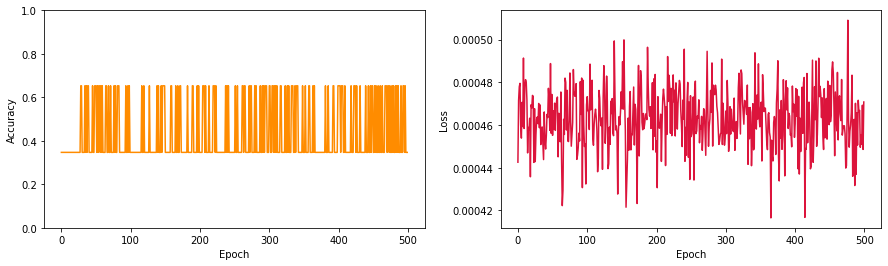

Max training accuracy: 0.6530944625407166
Test accuracy: 0.6428571428571429
time: 2.82 s (started: 2022-09-22 02:41:35 +00:00)


In [20]:
pB = PerceptronBiasClassification()
# Training
hist = pB.fit(X_train, y_train, 500, 0.001 )
# Display result
plotResult(hist)

#making predictions on test data
Y_pred_test = pB.predict(X_test)

#checking the accuracy of the model
print(f'Max training accuracy: {hist[2]}')  
print(f'Test accuracy: {accuracy_score(Y_pred_test, y_test)}')

### Tunning

Average test accuracy: 0.6274891774891774 +/- 8.881784197001253e-17
Accuracry on train set


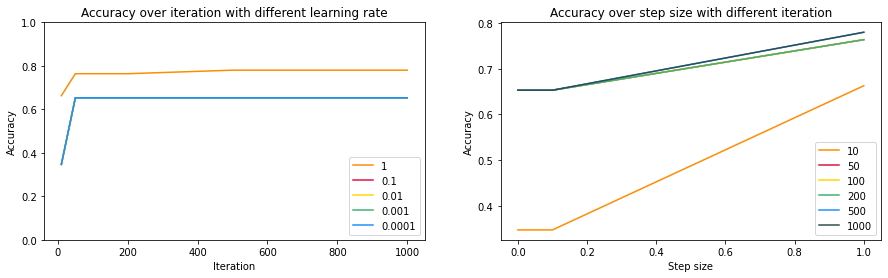

Accuracry on test set


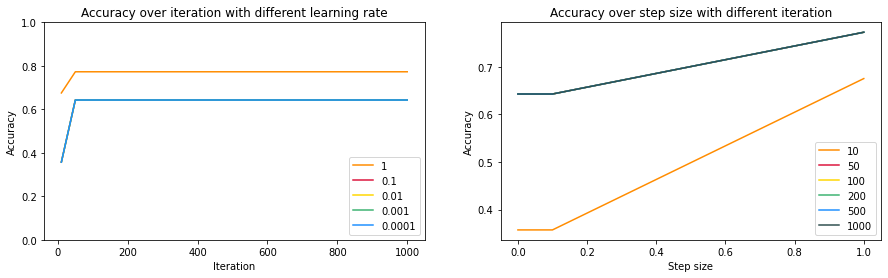

Max test accuracy: 0.7727272727272727 with Step size: 1 and 50 iterations
time: 50.1 s (started: 2022-09-22 02:41:38 +00:00)


In [21]:
bestParams2 = report(pB)

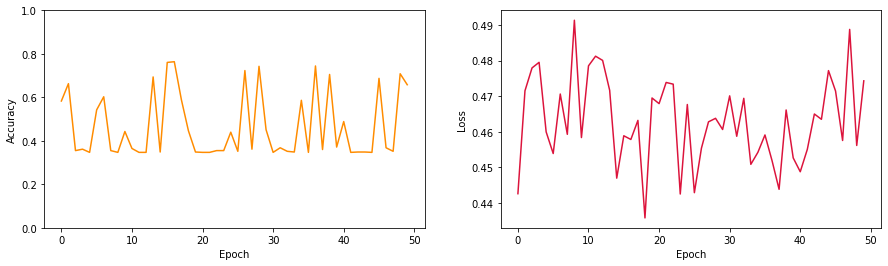

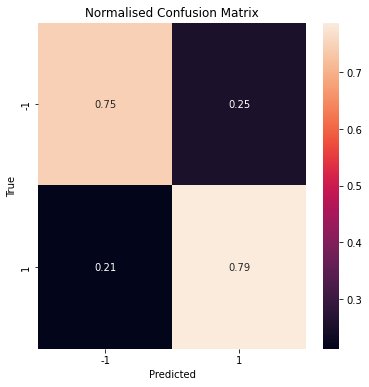

              precision    recall  f1-score   support

        -1.0       0.66      0.75      0.70        55
         1.0       0.85      0.79      0.82        99

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154

Max training accuracy: 0.7638436482084691
Test accuracy: 0.7727272727272727 

time: 744 ms (started: 2022-09-22 02:42:28 +00:00)


In [22]:
# Training
hist = pB.fit(X_train, y_train, bestParams2[0], bestParams2[1] )
# Display result
plotResult(hist)

#making predictions on test data
Y_pred_test = pB.predict(X_test)

# Confusion matrix
plotCFMatrix(y_test,Y_pred_test)

#checking the accuracy of the model
print(f'Max training accuracy: {hist[2]}')  
print(f'Test accuracy: {accuracy_score(Y_pred_test, y_test)} \n')

## Using sklearn library

In [23]:
## Without shuffle
from sklearn.linear_model import Perceptron
sklP = Perceptron(eta0=0.001, max_iter =500)
sklP.fit(X_train, y_train)

print(f'Test accuracy: {accuracy_score(sklP.predict(X_test), y_test)} \n')

Test accuracy: 0.7012987012987013 

time: 146 ms (started: 2022-09-22 02:42:29 +00:00)


In [24]:
from sklearn.model_selection import GridSearchCV
pct = Perceptron()
parameters = {'eta0':stepL, 'max_iter':iterL}
gridSPercpt = GridSearchCV(pct, parameters, cv=5, scoring='accuracy')
gridSPercpt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'eta0': [1, 0.1, 0.01, 0.001, 0.0001],
                         'max_iter': [10, 50, 100, 200, 500, 1000]},
             scoring='accuracy')

time: 321 ms (started: 2022-09-22 02:42:29 +00:00)


In [25]:
print(f'Best score is {gridSPercpt.best_score_} for best params of {gridSPercpt.best_params_}')  

Best score is 0.7443555910968945 for best params of {'eta0': 0.1, 'max_iter': 50}
time: 913 µs (started: 2022-09-22 02:42:29 +00:00)


In [26]:
print(f'Test accuracy: {accuracy_score(gridSPercpt.predict(X_test), y_test)} \n')

Test accuracy: 0.7012987012987013 

time: 1.9 ms (started: 2022-09-22 02:42:30 +00:00)


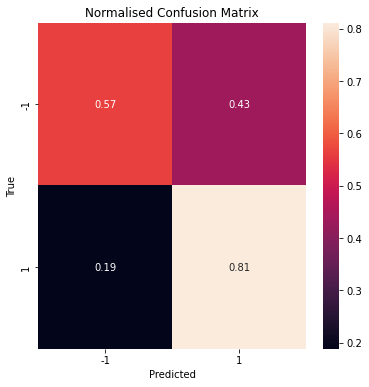

              precision    recall  f1-score   support

        -1.0       0.71      0.57      0.63        69
         1.0       0.70      0.81      0.75        85

    accuracy                           0.70       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.70      0.70      0.70       154

time: 230 ms (started: 2022-09-22 02:42:30 +00:00)


In [27]:
# Confusion matrix
plotCFMatrix(gridSPercpt.predict(X_test),y_test)

## Linear seperable data test


In [28]:
def gen_lin_separable_data():
    # generate training data in the 2-d case
    mean1, mean2 = np.array([0, 2]), np.array([2, 0])
    cov = np.array([[0.90, 0.72], [0.72, 0.90]])

    X1 = np.random.multivariate_normal(mean1, cov, 100)
    y1 = np.ones(len(X1))

    X2 = np.random.multivariate_normal(mean2, cov, 100)
    y2 = np.ones(len(X2)) * -1

    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    
    return X, y, X1, X2, y1, y2

time: 3.41 ms (started: 2022-09-22 02:42:30 +00:00)


In [29]:
X2, y2, X_n1, X_1, y_n1, y_1 = gen_lin_separable_data()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 42)

time: 21.5 ms (started: 2022-09-22 02:42:30 +00:00)


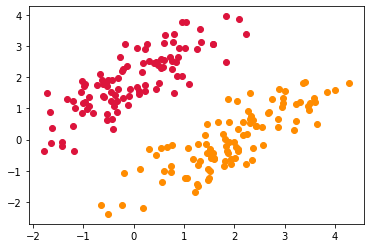

time: 154 ms (started: 2022-09-22 02:42:30 +00:00)


In [30]:
# Data distribution ploting
plt.scatter(X_n1[:,0], X_n1[:,1] , c='crimson')
plt.scatter(X_1[:,0], X_1[:,1] , c='darkorange')

### On the manual algorithm

In [31]:
pC2 = PerceptronClassification()
# Training
hist = pC2.fit(X_train2, y_train2, 100, 1 )

#making predictions on test data
Y_pred_test2 = pC2.predict(X_test2)

#checking the accuracy of the model
print(f'Max training accuracy: {hist[2]}')  
print(f'Test accuracy: {accuracy_score(Y_pred_test2, y_test2)}')

Max training accuracy: 1.0
Test accuracy: 1.0
time: 108 ms (started: 2022-09-22 02:42:30 +00:00)


### On Sciki learn library

In [32]:
sklP2 = Perceptron(eta0=0.1, max_iter =50)
sklP.fit(X_train2, y_train2)

print(f'Test accuracy: {accuracy_score(sklP.predict(X_test2), y_test2)} \n')

Test accuracy: 1.0 

time: 3.16 ms (started: 2022-09-22 02:42:30 +00:00)
